## El mejor RF Regressor

### Cargamos las imágenes y las juntamos todas en un dataframe:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ctapipe.io import TableLoader
import scipy

# RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargamos imágenes
with TableLoader("../datos/gamma-diffuse.dl2.h5", load_dl1_images=True,load_dl2=True, load_simulated=True) as loader_g:
    gamma_tel_events = loader_g.read_telescope_events("LST_LST_LSTCam", start=300000, stop=500000)
with TableLoader("../datos/gamma-diffuse_with_images_00.dl2.h5", load_dl1_images=True,load_dl2=True, load_simulated=True) as loader_g2:
    gamma_tel_events2 = loader_g2.read_telescope_events("LST_LST_LSTCam", start=0, stop=25000)

# Determinamos los parámetros
features = [
 #'obs_id',
 #'event_id',                          
 #'tel_id',
 'hillas_intensity',
 'hillas_skewness',
 'hillas_kurtosis',
 #'hillas_r',
 #'hillas_phi',
 'hillas_length',
 'hillas_width',
 #'hillas_psi',
 #'timing_intercept',
 #'timing_deviation',
 'timing_slope',
 #'leakage_intensity_width_2',
 'true_energy'
]

gamma_tel_events_f = gamma_tel_events[features]
gamma_tel_events_f2 = gamma_tel_events2[features]

# Convertimos a dataframe
df_gamma = gamma_tel_events_f.to_pandas()
df_gamma = df_gamma.dropna()
df_gamma2 = gamma_tel_events_f2.to_pandas()
df_gamma2 = df_gamma2.dropna()

# Juntamos los dataframes
df_gammaT = pd.concat([df_gamma, df_gamma2], axis=0)   

X = df_gamma.drop("true_energy", axis=1)                                              # Determina los parámetros 
y = df_gamma["true_energy"]

/tmp/ipykernel_22946/620163877.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf = RandomForestRegressor(n_estimators=125)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=125)

Mean Squared Error: 127.85308792583517
R-squared: 0.6512041052097635


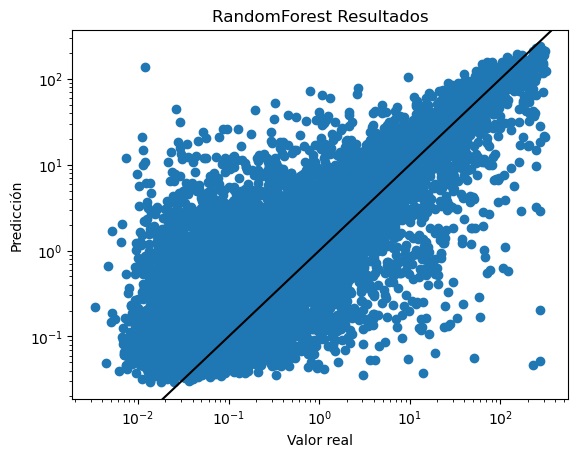

In [3]:
# Hacemos predicciones con el modelo:
y_pred = rf.predict(X_test)
 
# Evaluamos qué tal ha hecho las predicciones
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred) #plotting real points
plt.axline((1, 1), slope=1, c="k")

plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.show()

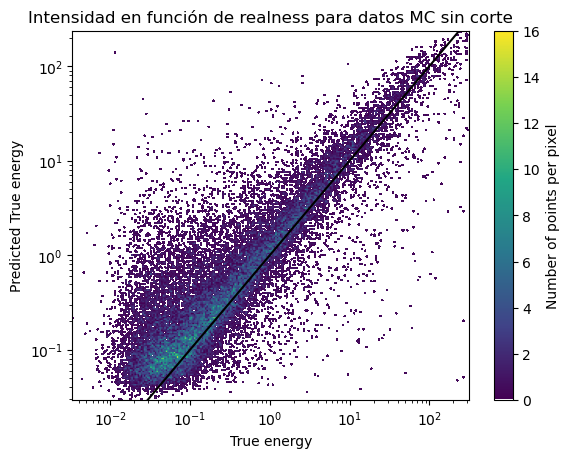

In [7]:
# Preparamos la representación
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, y_test, y_pred)
plt.xlabel('True energy')
plt.ylabel('Predicted True energy')
plt.axline((1, 1), slope=1, c="k")
plt.yscale('log')
plt.xscale('log')
plt.title('Intensidad en función de realness para datos MC sin corte')
plt.show()

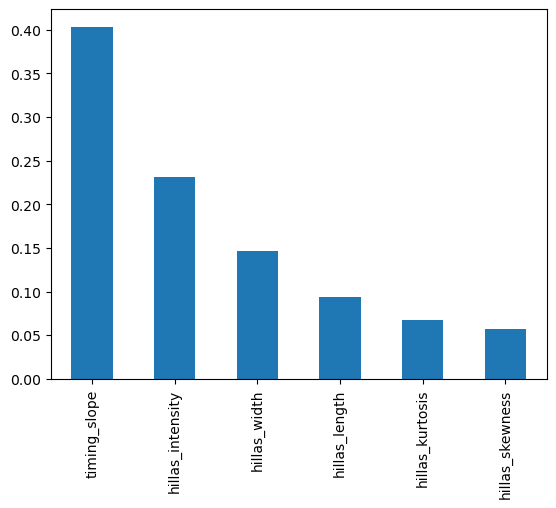

In [5]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()

In [5]:
y_test = y_test.values

for i in range(len(y_test)):
    for j in range(0, len(y_test)-i-1):
        if y_test[j] > y_test[j+1]:
            true_temp = y_test[j]
            y_test[j] = y_test[j+1]
            y_test[j+1] = true_temp

            pred_temp = y_pred[j]
            y_pred[j] = y_pred[j+1]
            y_pred[j+1] = pred_temp

# Sacamos los arrays de valores reales
test1 = y_test[0:2250]
test2 = y_test[2250:4500]
test3 = y_test[4500:6750]
test4 = y_test[6750:9000]
test5 = y_test[9000:11250]
test6 = y_test[11250:13500]
test7 = y_test[13500:15750]
test8 = y_test[15750:18000]
test9 = y_test[18000:20250]
test10 = y_test[20250:22685]

# Sacamos los arrays de valores predichos
pred1 = y_pred[0:2250]
pred2 = y_pred[2250:4500]
pred3 = y_pred[4500:6750]
pred4 = y_pred[6750:9000]
pred5 = y_pred[9000:11250]
pred6 = y_pred[11250:13500]
pred7 = y_pred[13500:15750]
pred8 = y_pred[15750:18000]
pred9 = y_pred[18000:20250]
pred10 = y_pred[20250:22685]

Mean pred = 0.35436126463507034
Standard Deviation pred = 1.2266794223702453
Skewness pred = 11.715500664972451
Kurtosis pred = 175.39092978772123
Mean test = 0.0220316693784876
Standard Deviation test = 0.006060214388174632
Skewness test = -0.47642341692633405
Kurtosis test = -0.5906816577167291


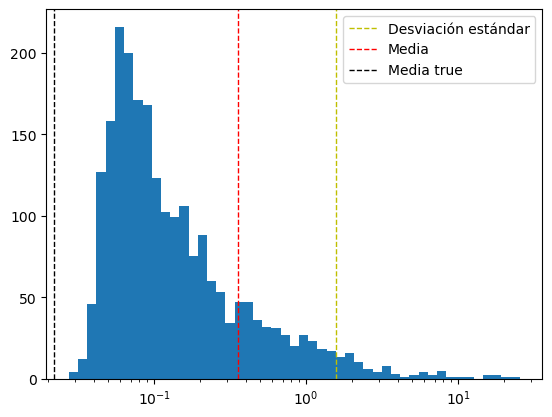

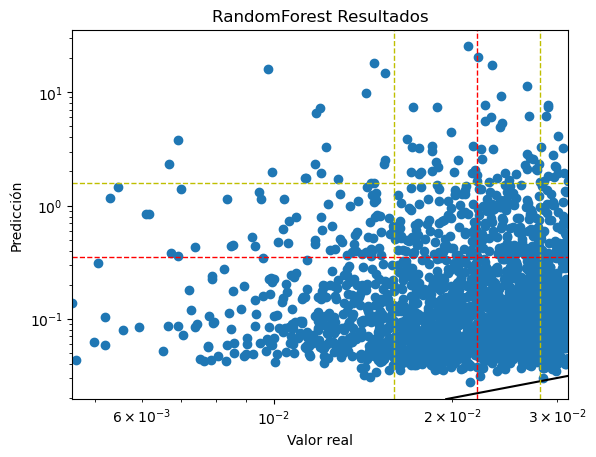

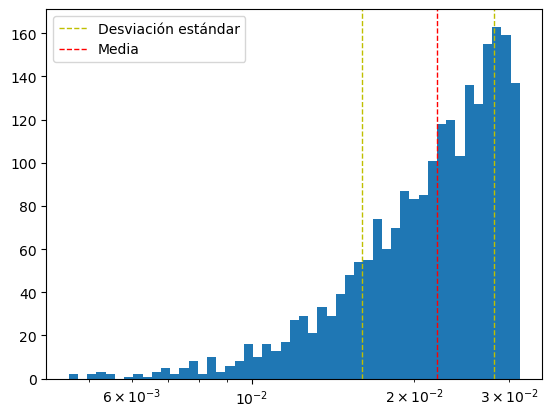

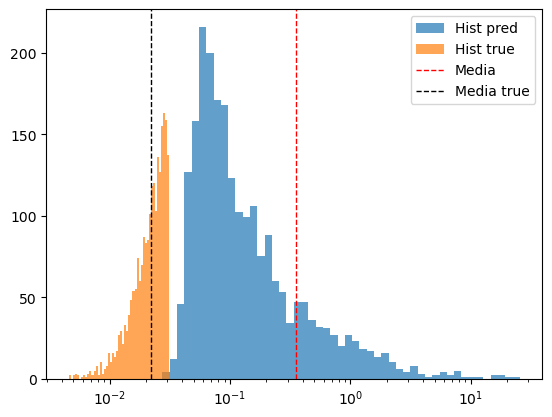

In [92]:
from scipy import stats
media = []
errorx = []
errory = []
mediatrue = []

media1 = pred1.mean()
errory1 = pred1.std()
errorx1 = test1.std()
mediatrue1 = test1.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media1 - 2*errory1, media1 + 2*errory1, 1000)
print ('Mean pred =', media1)
print ('Standard Deviation pred =', errory1)
print ('Skewness pred =', scipy.stats.skew(pred1))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred1))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue1 - 2*errorx1, mediatrue1 + 2*errorx1, 1000)
print ('Mean test =', mediatrue1)
print ('Standard Deviation test =', errorx1)
print ('Skewness test =', scipy.stats.skew(test1))
print ('Kurtosis test =', scipy.stats.kurtosis(test1))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred1, np.geomspace(pred1.min(), pred1.max(), num=50), range=(pred1.min(), pred1.max()))
plt.xscale('log')
plt.axvline(-errory1 + media1, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory1 + media1, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media1, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue1, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test1, pred1)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx1 + mediatrue1, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx1 + mediatrue1, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue1, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory1 + media1, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory1 + media1, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media1, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test1.min(), test1.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test1, np.geomspace(test1.min(), test1.max(), num=50), range=(test1.min(), test1.max()))
plt.xscale('log')
plt.axvline(-errorx1 + mediatrue1, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx1 + mediatrue1, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue1, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred1, np.geomspace(pred1.min(), pred1.max(), num=50), range=(pred1.min(), pred1.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test1, np.geomspace(test1.min(), test1.max(), num=50), range=(test1.min(), test1.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media1, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue1, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media1)
mediatrue.append(mediatrue1)
errory.append(errory1)
errorx.append(errorx1)

Mean pred = 0.30431971032728666
Standard Deviation pred = 1.0594985474419627
Skewness pred = 15.742075855225735
Kurtosis pred = 360.26026345590424
Mean test = 0.04066758093569014
Standard Deviation test = 0.005520824223982915
Skewness test = 0.04119830849170185
Kurtosis test = -1.2177877534343187


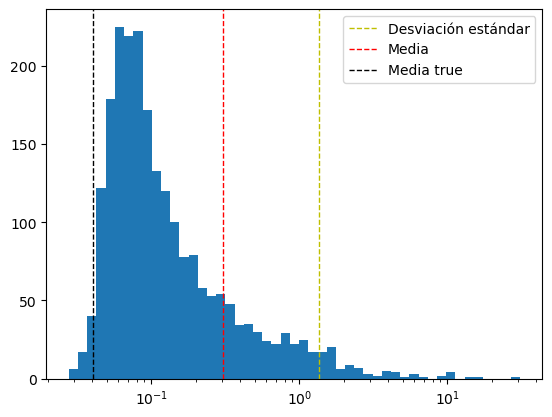

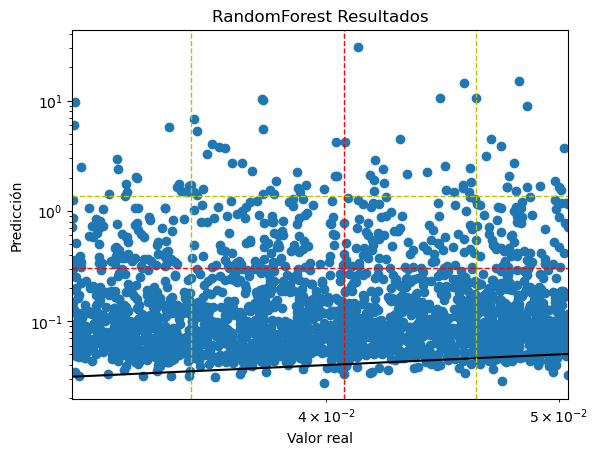

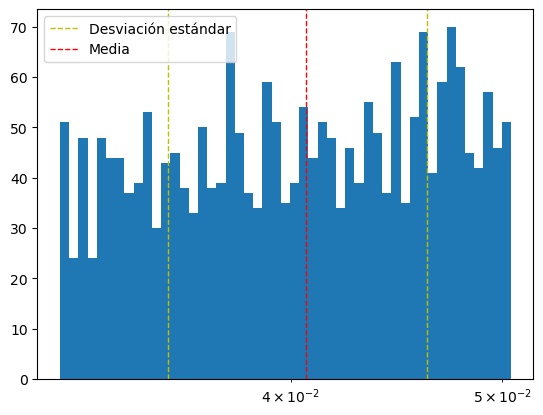

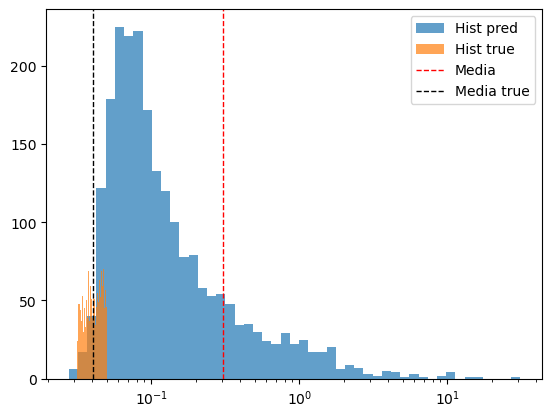

In [93]:
media2 = pred2.mean()
errory2 = pred2.std()
errorx2 = test2.std()
mediatrue2 = test2.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media2 - 2*errory2, media2 + 2*errory2, 1000)
print ('Mean pred =', media2)
print ('Standard Deviation pred =', errory2)
print ('Skewness pred =', scipy.stats.skew(pred2))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred2))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue2 - 2*errorx2, mediatrue2 + 2*errorx2, 1000)
print ('Mean test =', mediatrue2)
print ('Standard Deviation test =', errorx2)
print ('Skewness test =', scipy.stats.skew(test2))
print ('Kurtosis test =', scipy.stats.kurtosis(test2))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred2, np.geomspace(pred2.min(), pred2.max(), num=50), range=(pred2.min(), pred2.max()))
plt.xscale('log')
plt.axvline(-errory2 + media2, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory2 + media2, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media2, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue2, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test2, pred2)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx2 + mediatrue2, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx2 + mediatrue2, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue2, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory2 + media2, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory2 + media2, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media2, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test2.min(), test2.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test2, np.geomspace(test2.min(), test2.max(), num=50), range=(test2.min(), test2.max()))
plt.xscale('log')
plt.axvline(-errorx2 + mediatrue2, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx2 + mediatrue2, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue2, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred2, np.geomspace(pred2.min(), pred2.max(), num=50), range=(pred2.min(), pred2.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test2, np.geomspace(test2.min(), test2.max(), num=50), range=(test2.min(), test2.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media2, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue2, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media2)
mediatrue.append(mediatrue2)
errory.append(errory2)
errorx.append(errorx2)

Mean pred = 0.2827308376220746
Standard Deviation pred = 1.0022303959102845
Skewness pred = 18.515781113385298
Kurtosis pred = 451.40597083688965
Mean test = 0.06311961183448632
Standard Deviation test = 0.007813643914598873
Skewness test = 0.08867458977347259
Kurtosis test = -1.2322615894207014


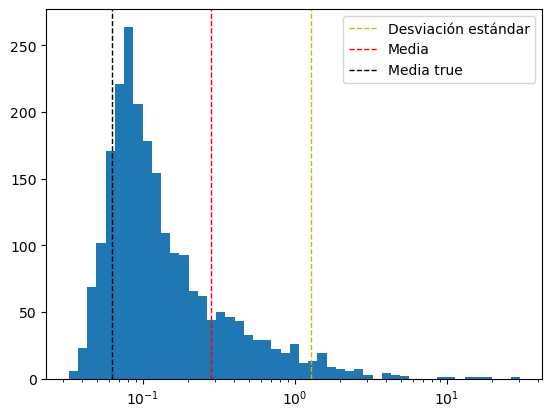

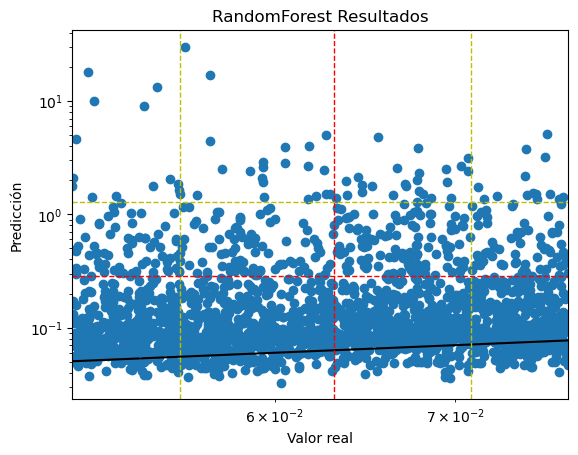

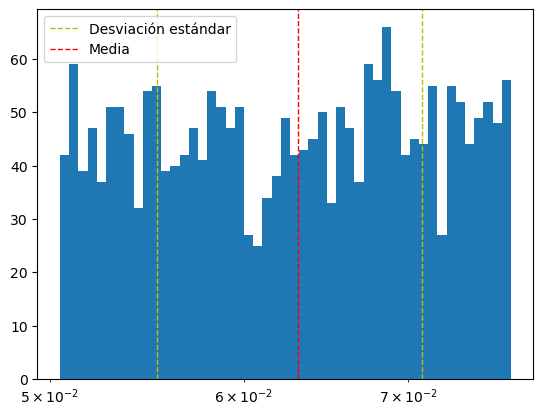

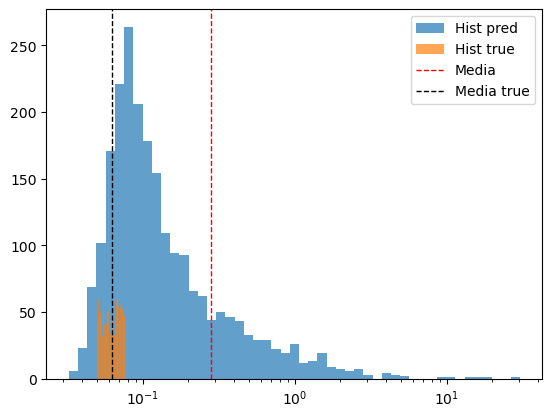

In [94]:
media3 = pred3.mean()
errory3 = pred3.std()
errorx3 = test3.std()
mediatrue3 = test3.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media3 - 2*errory3, media3 + 2*errory3, 1000)
print ('Mean pred =', media3)
print ('Standard Deviation pred =', errory3)
print ('Skewness pred =', scipy.stats.skew(pred3))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred3))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue3 - 2*errorx3, mediatrue3 + 2*errorx3, 1000)
print ('Mean test =', mediatrue3)
print ('Standard Deviation test =', errorx3)
print ('Skewness test =', scipy.stats.skew(test3))
print ('Kurtosis test =', scipy.stats.kurtosis(test3))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred3, np.geomspace(pred3.min(), pred3.max(), num=50), range=(pred3.min(), pred3.max()))
plt.xscale('log')
plt.axvline(-errory3 + media3, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory3 + media3, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media3, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue3, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test3, pred3)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx3 + mediatrue3, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx3 + mediatrue3, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue3, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory3 + media3, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory3 + media3, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media3, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test3.min(), test3.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test3, np.geomspace(test3.min(), test3.max(), num=50), range=(test3.min(), test3.max()))
plt.xscale('log')
plt.axvline(-errorx3 + mediatrue3, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx3 + mediatrue3, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue3, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred3, np.geomspace(pred3.min(), pred3.max(), num=50), range=(pred3.min(), pred3.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test3, np.geomspace(test3.min(), test3.max(), num=50), range=(test3.min(), test3.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media3, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue3, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media3)
mediatrue.append(mediatrue3)
errory.append(errory3)
errorx.append(errorx3)

Mean pred = 0.3716965938540349
Standard Deviation pred = 1.6260359705123468
Skewness pred = 25.047619790329964
Kurtosis pred = 839.416057080199
Mean test = 0.09626934358477593
Standard Deviation test = 0.011757026616745206
Skewness test = 0.17632188093080925
Kurtosis test = -1.1501409184687534


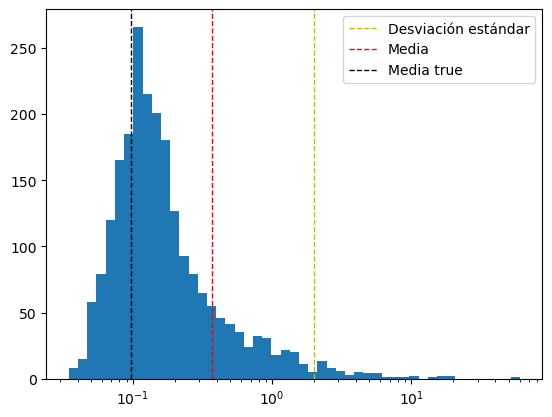

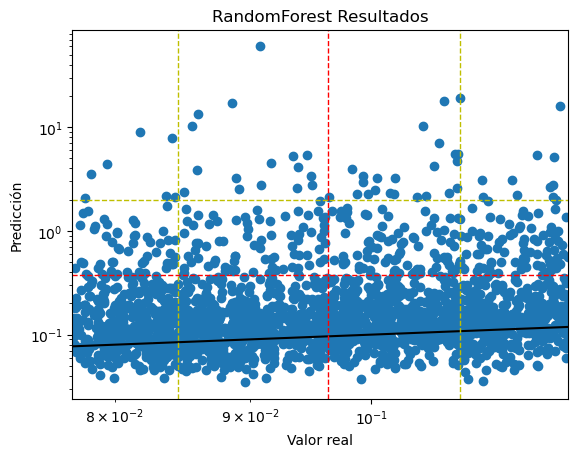

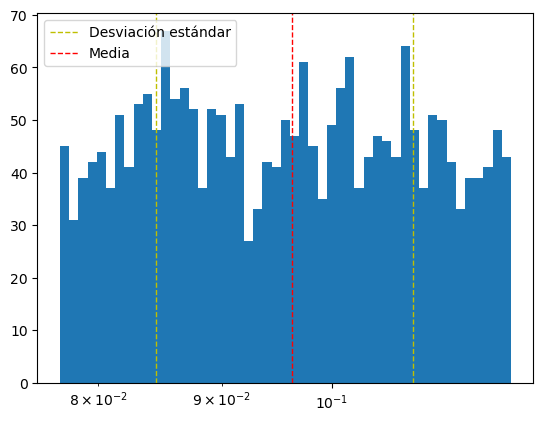

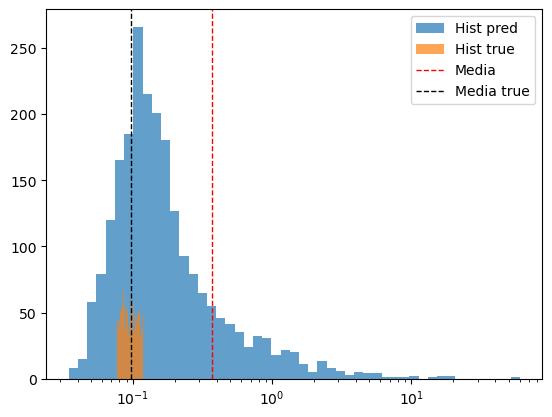

In [95]:
media4 = pred4.mean()
errory4 = pred4.std()
errorx4 = test4.std()
mediatrue4 = test4.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media4 - 2*errory4, media4 + 2*errory4, 1000)
print ('Mean pred =', media4)
print ('Standard Deviation pred =', errory4)
print ('Skewness pred =', scipy.stats.skew(pred4))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred4))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue4 - 2*errorx4, mediatrue4 + 2*errorx4, 1000)
print ('Mean test =', mediatrue4)
print ('Standard Deviation test =', errorx4)
print ('Skewness test =', scipy.stats.skew(test4))
print ('Kurtosis test =', scipy.stats.kurtosis(test4))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred4, np.geomspace(pred4.min(), pred4.max(), num=50), range=(pred4.min(), pred4.max()))
plt.xscale('log')
plt.axvline(-errory4 + media4, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory4 + media4, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media4, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue4, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test4, pred4)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx4 + mediatrue4, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx4 + mediatrue4, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue4, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory4 + media4, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory4 + media4, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media4, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test4.min(), test4.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test4, np.geomspace(test4.min(), test4.max(), num=50), range=(test4.min(), test4.max()))
plt.xscale('log')
plt.axvline(-errorx4 + mediatrue4, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx4 + mediatrue4, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue4, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred4, np.geomspace(pred4.min(), pred4.max(), num=50), range=(pred4.min(), pred4.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test4, np.geomspace(test4.min(), test4.max(), num=50), range=(test4.min(), test4.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media4, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue4, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media4)
mediatrue.append(mediatrue4)
errory.append(errory4)
errorx.append(errorx4)

Mean pred = 0.4886071686028026
Standard Deviation pred = 1.342232454469117
Skewness pred = 11.489725159825474
Kurtosis pred = 186.15610062552838
Mean test = 0.15266968920826912
Standard Deviation test = 0.022115439956792365
Skewness test = 0.23356408541927398
Kurtosis test = -1.143728125915479


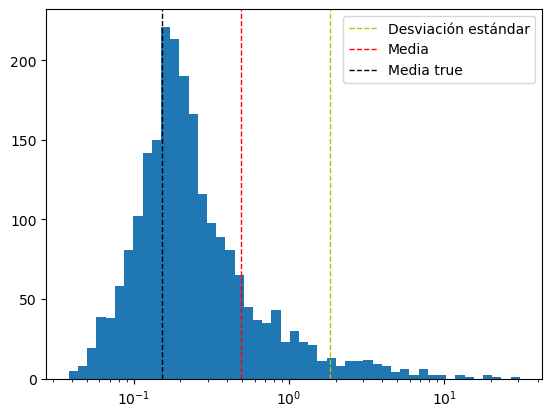

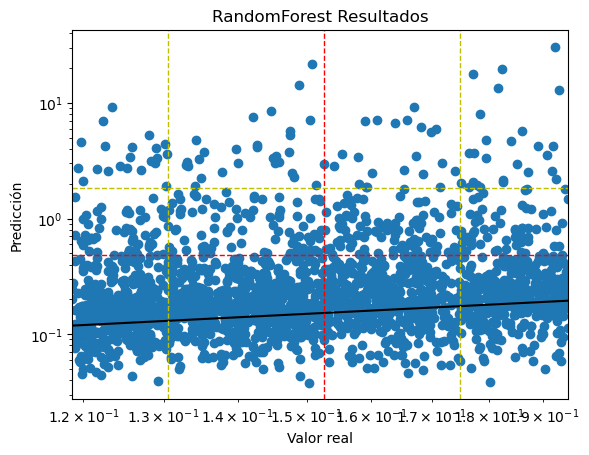

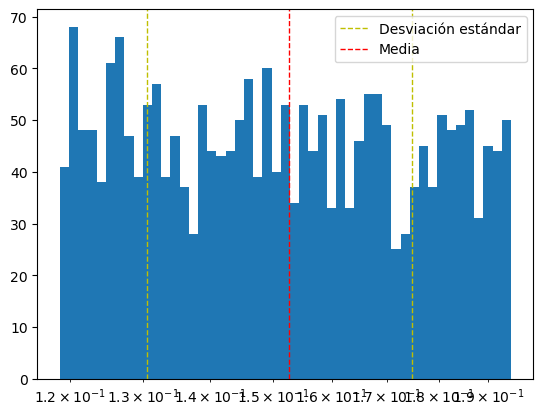

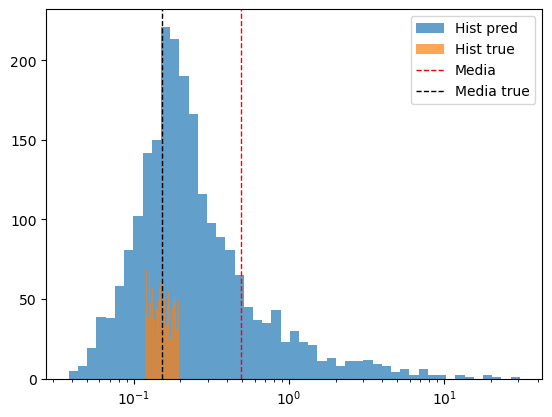

In [96]:
media5 = pred5.mean()
errory5 = pred5.std()
errorx5 = test5.std()
mediatrue5 = test5.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media5 - 2*errory5, media5 + 2*errory5, 1000)
print ('Mean pred =', media5)
print ('Standard Deviation pred =', errory5)
print ('Skewness pred =', scipy.stats.skew(pred5))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred5))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue5 - 2*errorx5, mediatrue5 + 2*errorx5, 1000)
print ('Mean test =', mediatrue5)
print ('Standard Deviation test =', errorx5)
print ('Skewness test =', scipy.stats.skew(test5))
print ('Kurtosis test =', scipy.stats.kurtosis(test5))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred5, np.geomspace(pred5.min(), pred5.max(), num=50), range=(pred5.min(), pred5.max()))
plt.xscale('log')
plt.axvline(-errory5 + media5, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory5 + media5, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media5, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue5, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test5, pred5)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx5 + mediatrue5, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx5 + mediatrue5, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue5, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory5 + media5, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory5 + media5, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media5, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test5.min(), test5.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test5, np.geomspace(test5.min(), test5.max(), num=50), range=(test5.min(), test5.max()))
plt.xscale('log')
plt.axvline(-errorx5 + mediatrue5, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx5 + mediatrue5, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue5, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred5, np.geomspace(pred5.min(), pred5.max(), num=50), range=(pred5.min(), pred5.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test5, np.geomspace(test5.min(), test5.max(), num=50), range=(test5.min(), test5.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media5, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue5, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media5)
mediatrue.append(mediatrue5)
errory.append(errory5)
errorx.append(errorx5)

Mean pred = 0.6247173922720005
Standard Deviation pred = 1.1837079759266043
Skewness pred = 7.746561472358263
Kurtosis pred = 88.80327423526195
Mean test = 0.2583330184486177
Standard Deviation test = 0.04276029447764807
Skewness test = 0.2931462965644224
Kurtosis test = -1.1167035069130145


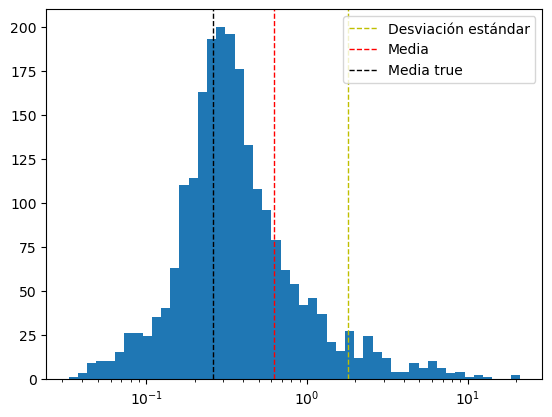

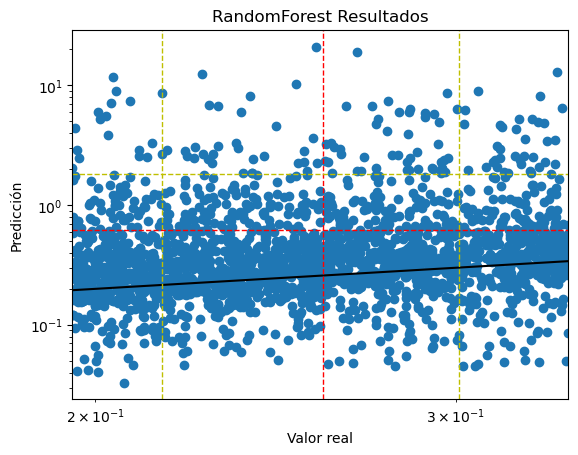

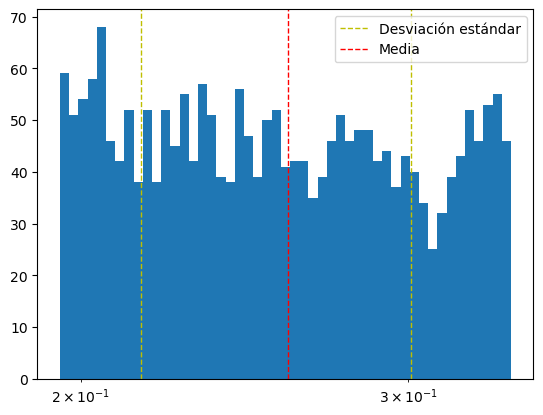

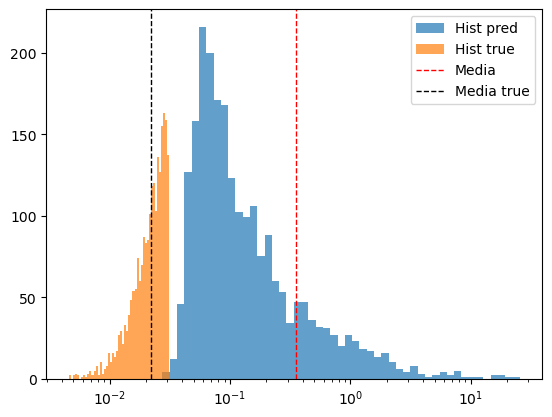

In [97]:
media6 = pred6.mean()
errory6 = pred6.std()
errorx6 = test6.std()
mediatrue6 = test6.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media6 - 2*errory6, media6 + 2*errory6, 1000)
print ('Mean pred =', media6)
print ('Standard Deviation pred =', errory6)
print ('Skewness pred =', scipy.stats.skew(pred6))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred6))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue6 - 2*errorx6, mediatrue6 + 2*errorx6, 1000)
print ('Mean test =', mediatrue6)
print ('Standard Deviation test =', errorx6)
print ('Skewness test =', scipy.stats.skew(test6))
print ('Kurtosis test =', scipy.stats.kurtosis(test6))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred6, np.geomspace(pred6.min(), pred6.max(), num=50), range=(pred6.min(), pred6.max()))
plt.xscale('log')
plt.axvline(-errory6 + media6, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory6 + media6, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media6, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue6, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test6, pred6)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx6 + mediatrue6, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx6 + mediatrue6, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue6, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory6 + media6, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory6 + media6, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media6, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test6.min(), test6.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test6, np.geomspace(test6.min(), test6.max(), num=50), range=(test6.min(), test6.max()))
plt.xscale('log')
plt.axvline(-errorx6 + mediatrue6, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx6 + mediatrue6, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue6, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred1, np.geomspace(pred1.min(), pred1.max(), num=50), range=(pred1.min(), pred1.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test1, np.geomspace(test1.min(), test1.max(), num=50), range=(test1.min(), test1.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media1, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue1, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media6)
mediatrue.append(mediatrue6)
errory.append(errory6)
errorx.append(errorx6)

Mean pred = 0.965155501597066
Standard Deviation pred = 1.7897820637686945
Skewness pred = 9.731436166319803
Kurtosis pred = 129.98507828626055
Mean test = 0.48294804872406855
Standard Deviation test = 0.09366924776859517
Skewness test = 0.26461090800365
Kurtosis test = -1.0992269475511491


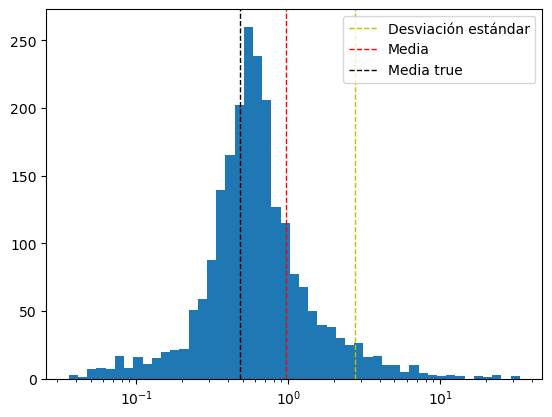

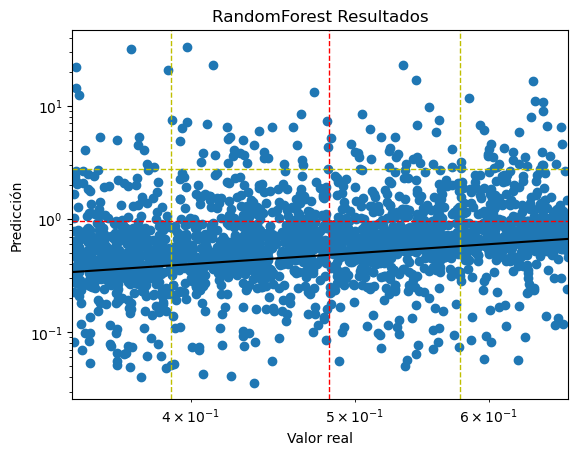

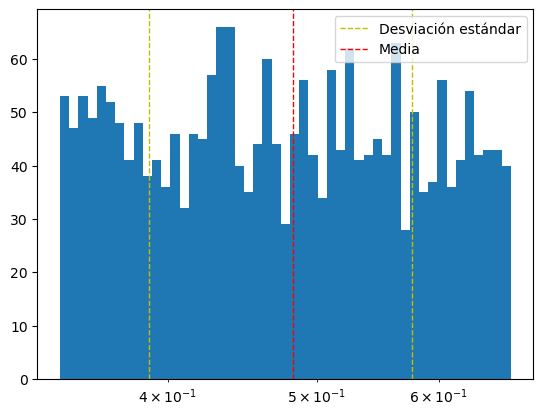

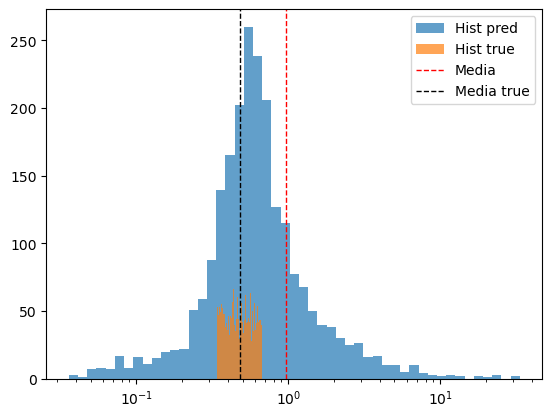

In [98]:
media7 = pred7.mean()
errory7 = pred7.std()
errorx7 = test7.std()
mediatrue7 = test7.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media7 - 2*errory7, media7 + 2*errory7, 1000)
print ('Mean pred =', media7)
print ('Standard Deviation pred =', errory7)
print ('Skewness pred =', scipy.stats.skew(pred7))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred7))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue7 - 2*errorx7, mediatrue7 + 2*errorx7, 1000)
print ('Mean test =', mediatrue7)
print ('Standard Deviation test =', errorx7)
print ('Skewness test =', scipy.stats.skew(test7))
print ('Kurtosis test =', scipy.stats.kurtosis(test7))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred7, np.geomspace(pred7.min(), pred7.max(), num=50), range=(pred7.min(), pred7.max()))
plt.xscale('log')
plt.axvline(-errory7 + media7, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory7 + media7, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media7, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue7, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test7, pred7)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx7 + mediatrue7, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx7 + mediatrue7, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue7, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory7 + media7, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory7 + media7, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media7, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test7.min(), test7.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test7, np.geomspace(test7.min(), test7.max(), num=50), range=(test7.min(), test7.max()))
plt.xscale('log')
plt.axvline(-errorx7 + mediatrue7, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx7 + mediatrue7, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue7, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred7, np.geomspace(pred7.min(), pred7.max(), num=50), range=(pred7.min(), pred7.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test7, np.geomspace(test7.min(), test7.max(), num=50), range=(test7.min(), test7.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media7, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue7, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media7)
mediatrue.append(mediatrue7)
errory.append(errory7)
errorx.append(errorx7)

Mean pred = 1.8523406682134171
Standard Deviation pred = 2.8537407141720728
Skewness pred = 8.600250889340082
Kurtosis pred = 106.15757533881565
Mean test = 1.040360363536411
Standard Deviation test = 0.2575626260636609
Skewness test = 0.3397680354262722
Kurtosis test = -1.0896794342164011


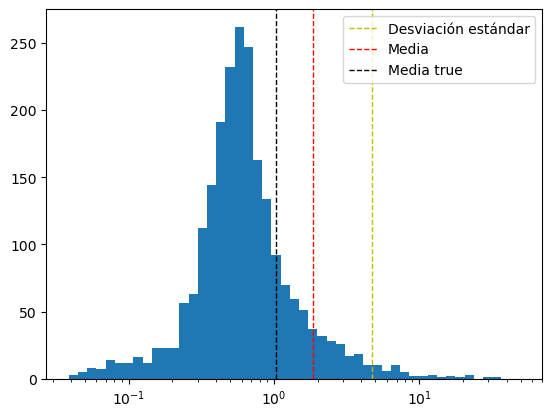

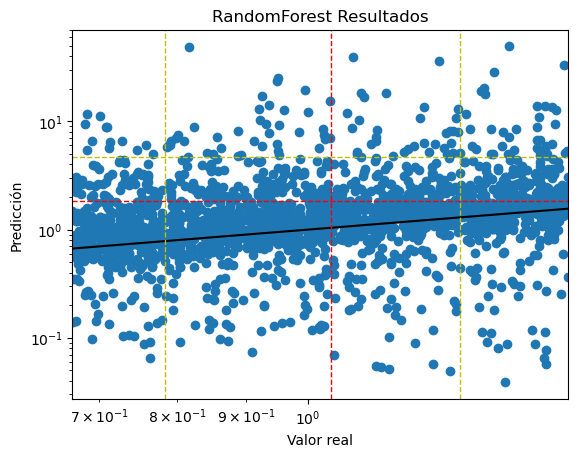

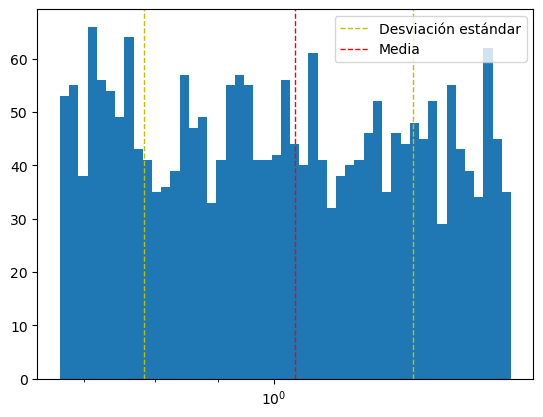

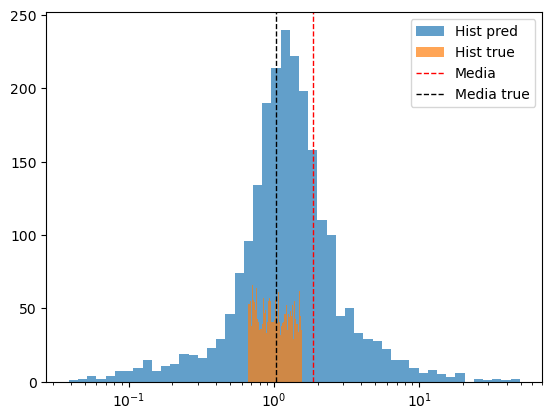

In [99]:
media8 = pred8.mean()
errory8 = pred8.std()
errorx8 = test8.std()
mediatrue8 = test8.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media8 - 2*errory8, media8 + 2*errory8, 1000)
print ('Mean pred =', media8)
print ('Standard Deviation pred =', errory8)
print ('Skewness pred =', scipy.stats.skew(pred8))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred8))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue8 - 2*errorx8, mediatrue8 + 2*errorx8, 1000)
print ('Mean test =', mediatrue8)
print ('Standard Deviation test =', errorx8)
print ('Skewness test =', scipy.stats.skew(test8))
print ('Kurtosis test =', scipy.stats.kurtosis(test8))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred7, np.geomspace(pred8.min(), pred8.max(), num=50), range=(pred8.min(), pred8.max()))
plt.xscale('log')
plt.axvline(-errory8 + media8, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory8 + media8, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media8, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue8, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test8, pred8)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx8 + mediatrue8, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx8 + mediatrue8, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue8, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory8 + media8, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory8 + media8, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media8, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test8.min(), test8.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test8, np.geomspace(test8.min(), test8.max(), num=50), range=(test8.min(), test8.max()))
plt.xscale('log')
plt.axvline(-errorx8 + mediatrue8, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx8 + mediatrue8, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue8, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred8, np.geomspace(pred8.min(), pred8.max(), num=50), range=(pred8.min(), pred8.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test8, np.geomspace(test8.min(), test8.max(), num=50), range=(test8.min(), test8.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media8, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue8, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media8)
mediatrue.append(mediatrue8)
errory.append(errory8)
errorx.append(errorx8)

Mean pred = 4.55420688635584
Standard Deviation pred = 6.0927571874728725
Skewness pred = 8.007560074804754
Kurtosis pred = 96.81089342565004
Mean test = 2.958009156015184
Standard Deviation test = 1.0418941099848698
Skewness test = 0.5596326070799937
Kurtosis test = -0.760637702380055


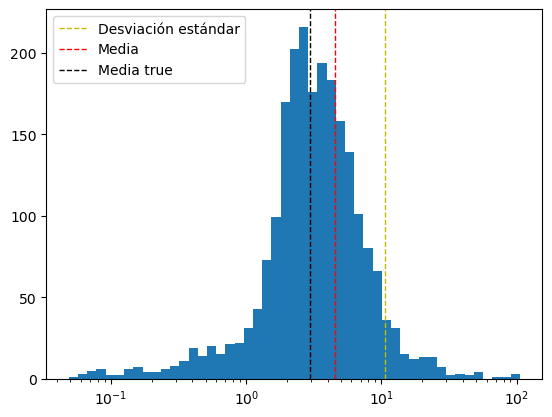

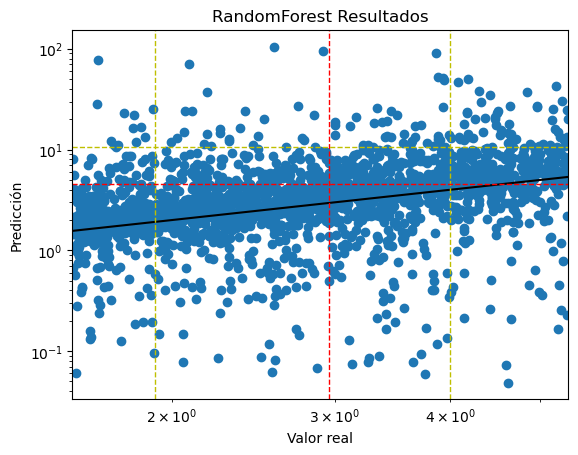

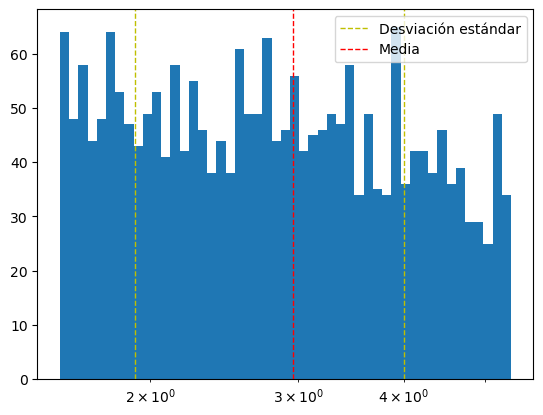

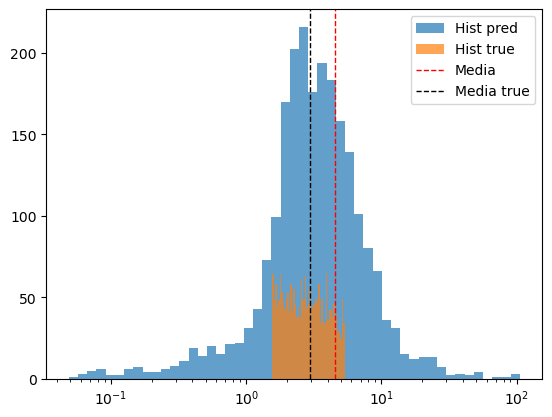

In [100]:
media9 = pred9.mean()
errory9 = pred9.std()
errorx9 = test9.std()
mediatrue9 = test9.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media9 - 2*errory9, media9 + 2*errory9, 1000)
print ('Mean pred =', media9)
print ('Standard Deviation pred =', errory9)
print ('Skewness pred =', scipy.stats.skew(pred9))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred9))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue9 - 2*errorx9, mediatrue9 + 2*errorx9, 1000)
print ('Mean test =', mediatrue9)
print ('Standard Deviation test =', errorx9)
print ('Skewness test =', scipy.stats.skew(test9))
print ('Kurtosis test =', scipy.stats.kurtosis(test9))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred9, np.geomspace(pred9.min(), pred9.max(), num=50), range=(pred9.min(), pred9.max()))
plt.xscale('log')
plt.axvline(-errory9 + media9, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory9 + media9, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media9, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue9, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test9, pred9)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx9 + mediatrue9, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx9 + mediatrue9, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue9, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory9 + media9, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory9 + media9, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media9, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test9.min(), test9.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test9, np.geomspace(test9.min(), test9.max(), num=50), range=(test9.min(), test9.max()))
plt.xscale('log')
plt.axvline(-errorx9 + mediatrue9, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx9 + mediatrue9, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue9, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred9, np.geomspace(pred9.min(), pred9.max(), num=50), range=(pred9.min(), pred9.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test9, np.geomspace(test9.min(), test9.max(), num=50), range=(test9.min(), test9.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media9, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue9, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media9)
mediatrue.append(mediatrue9)
errory.append(errory9)
errorx.append(errorx9)

Mean pred = 30.314652253525242
Standard Deviation pred = 35.50487517747687
Skewness pred = 2.408974967976709
Kurtosis pred = 6.826204664331012
Mean test = 34.996411574400916
Standard Deviation test = 49.36011374188584
Skewness test = 3.1744931141505295
Kurtosis test = 11.334765939711579


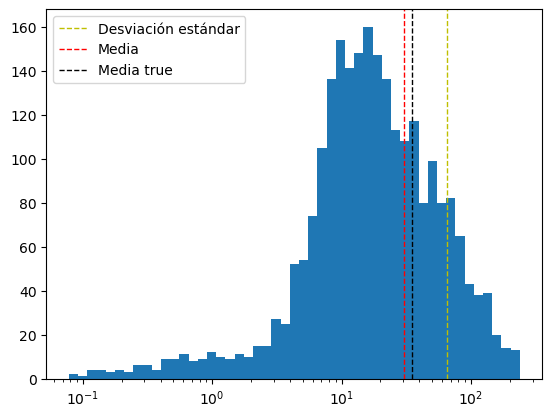

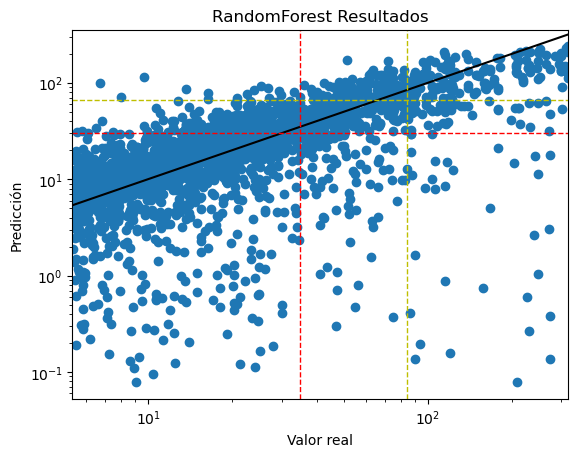

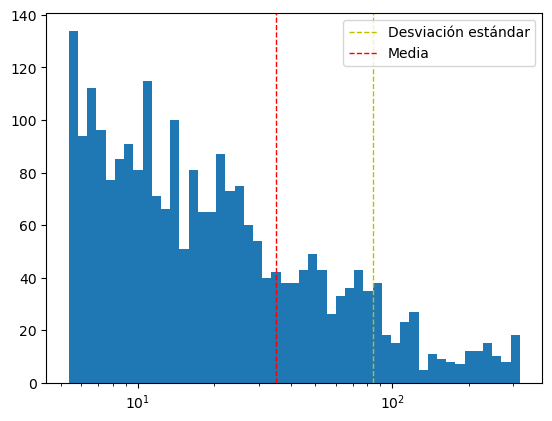

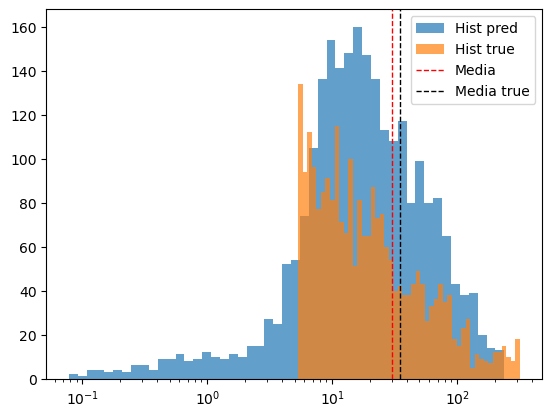

In [101]:
media10 = pred10.mean()
errory10 = pred10.std()
errorx10 = test10.std()
mediatrue10 = test10.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(media10 - 2*errory10, media10 + 2*errory10, 1000)
print ('Mean pred =', media10)
print ('Standard Deviation pred =', errory10)
print ('Skewness pred =', scipy.stats.skew(pred10))
print ('Kurtosis pred =', scipy.stats.kurtosis(pred10))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrue10 - 2*errorx10, mediatrue10 + 2*errorx10, 1000)
print ('Mean test =', mediatrue10)
print ('Standard Deviation test =', errorx10)
print ('Skewness test =', scipy.stats.skew(test10))
print ('Kurtosis test =', scipy.stats.kurtosis(test10))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(pred10, np.geomspace(pred10.min(), pred10.max(), num=50), range=(pred10.min(), pred10.max()))
plt.xscale('log')
plt.axvline(-errory10 + media10, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errory10 + media10, color='y', linestyle='dashed', linewidth=1)
plt.axvline(media10, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue10, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(test10, pred10)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorx10 + mediatrue10, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorx10 + mediatrue10, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue10, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-errory10 + media10, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(errory10 + media10, color='y', linestyle='dashed', linewidth=1)
plt.axhline(media10, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(test10.min(), test10.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(test10, np.geomspace(test10.min(), test10.max(), num=50), range=(test10.min(), test10.max()))
plt.xscale('log')
plt.axvline(-errorx10 + mediatrue10, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorx10 + mediatrue10, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrue10, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(pred10, np.geomspace(pred10.min(), pred10.max(), num=50), range=(pred10.min(), pred10.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(test10, np.geomspace(test10.min(), test10.max(), num=50), range=(test10.min(), test10.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(media10, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrue10, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

# Añadimos la media y los errores para el plot final
media.append(media10)
mediatrue.append(mediatrue10)
errory.append(errory10)
errorx.append(errorx10)

Mean pred = 4.225787273095132
Standard Deviation pred = 14.981337786931098
Skewness pred = 7.209451703531476
Kurtosis pred = 66.50792329034448
Mean test = 4.263772592788834
Standard Deviation test = 19.388993881010702
Skewness test = 9.350400163989299
Kurtosis test = 108.44110492672395


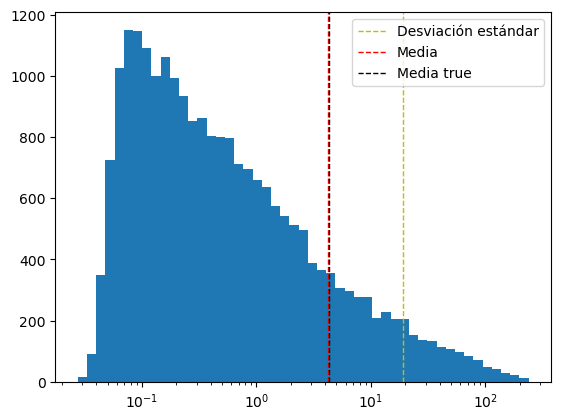

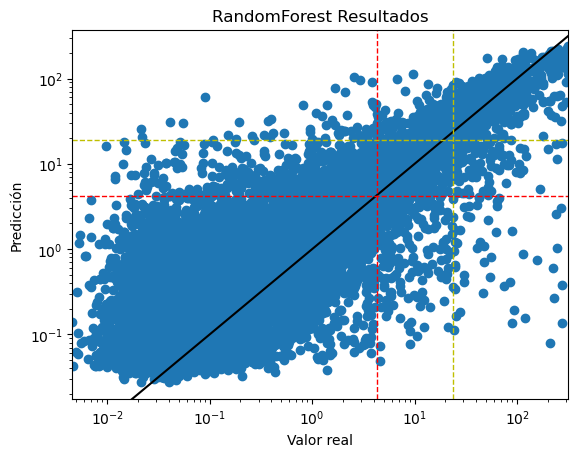

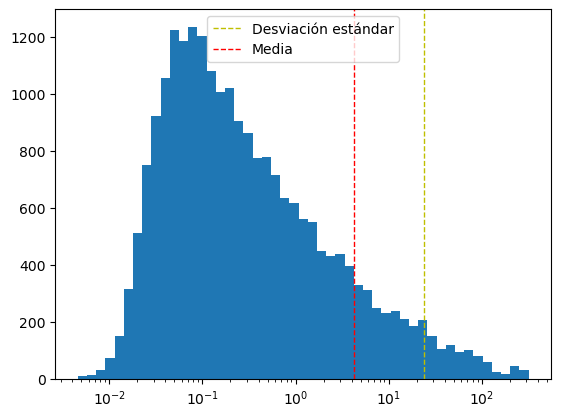

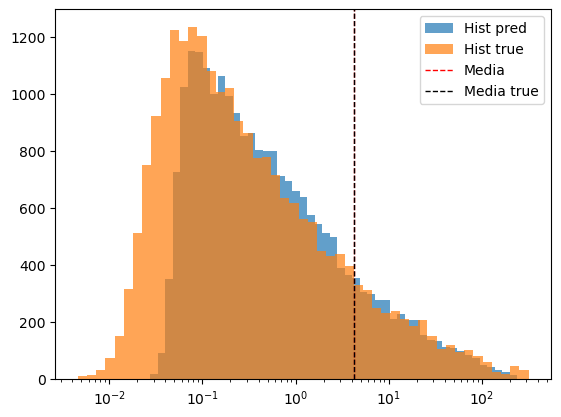

In [102]:
mediaT = y_pred.mean()
erroryT = y_pred.std()
errorxT = y_test.std()
mediatrueT = y_test.mean()

# Calculamos los parámetros de la reconstrucción de energías
x_pred = np.linspace(mediaT - 2*erroryT, mediaT + 2*erroryT, 1000)
print ('Mean pred =', mediaT)
print ('Standard Deviation pred =', erroryT)
print ('Skewness pred =', scipy.stats.skew(y_pred))
print ('Kurtosis pred =', scipy.stats.kurtosis(y_pred))

# Calculamos los parámetros de las energías verdaderas
x_test = np.linspace(mediatrueT - 2*errorxT, mediatrueT + 2*errorxT, 1000)
print ('Mean test =', mediatrueT)
print ('Standard Deviation test =', errorxT)
print ('Skewness test =', scipy.stats.skew(y_test))
print ('Kurtosis test =', scipy.stats.kurtosis(y_test))

# Represenatamos el histograma de la reconstrucción de energías
plt.hist(y_pred, np.geomspace(y_pred.min(), y_pred.max(), num=50), range=(y_pred.min(), y_pred.max()))
plt.xscale('log')
plt.axvline(-erroryT + mediaT, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(erroryT + mediaT, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediaT, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrueT, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.legend()
plt.show()

# Representamos la reconstrucción frente a los valores reales
plt.scatter(y_test, y_pred)
plt.axline((1, 1), slope=1, c="k")
plt.title("RandomForest Resultados")
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.yscale('log')
plt.xscale('log')
plt.axvline(-errorxT + mediatrueT, color='y', linestyle='dashed', linewidth=1, label='Std true')
plt.axvline(errorxT + mediatrueT, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrueT, color='r', linestyle='dashed', linewidth=1, label='Media true')
plt.axhline(-erroryT + mediaT, color='y', linestyle='dashed', linewidth=1, label='Std pred')
plt.axhline(erroryT + mediaT, color='y', linestyle='dashed', linewidth=1)
plt.axhline(mediaT, color='r', linestyle='dashed', linewidth=1, label='Media pred')
plt.xlim(y_test.min(), y_test.max())
plt.show()

# Representamos el histograma de las energías verdaderas
plt.hist(y_test, np.geomspace(y_test.min(), y_test.max(), num=50), range=(y_test.min(), y_test.max()))
plt.xscale('log')
plt.axvline(-errorxT + mediatrueT, color='y', linestyle='dashed', linewidth=1, label='Desviación estándar')
plt.axvline(errorxT + mediatrueT, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mediatrueT, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()
plt.show()

# Representamos los dos histogramas
plt.hist(y_pred, np.geomspace(y_pred.min(), y_pred.max(), num=50), range=(y_pred.min(), y_pred.max()), alpha = 0.7, label = 'Hist pred')
plt.hist(y_test, np.geomspace(y_test.min(), y_test.max(), num=50), range=(y_test.min(), y_test.max()), alpha = 0.7, label = 'Hist true')
plt.xscale('log')
plt.axvline(mediaT, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediatrueT, color='k', linestyle='dashed', linewidth=1, label='Media true')
plt.xscale('log')
plt.legend()
plt.show()

Representamos ahora la gráfica resumen de los 10 puntos de medias y desviaciones obtenidos:

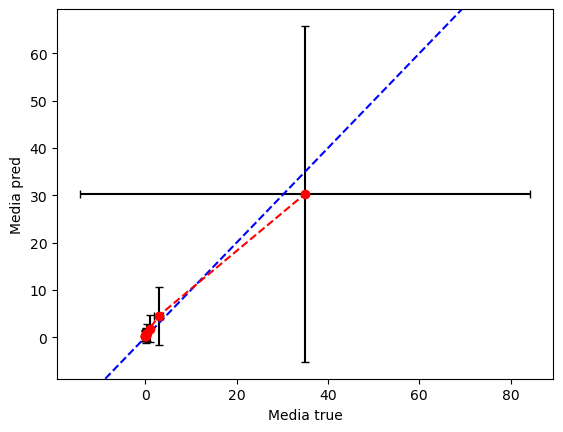

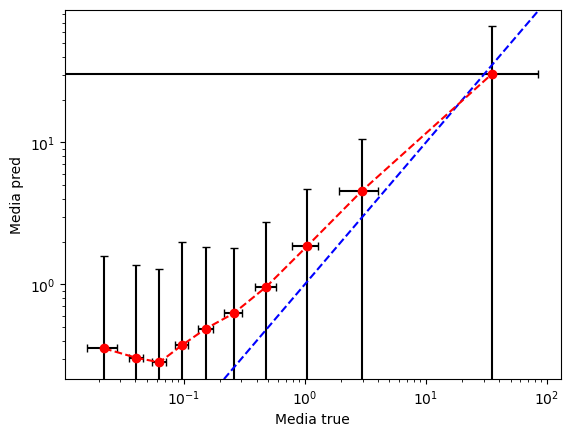

In [120]:
plt.errorbar(mediatrue, media, errory, errorx, capsize=3, fmt="r--o", ecolor = "black")
plt.axline((1, 1), slope=1, c="b", linestyle='dashed')
plt.xlabel('Media true')
plt.ylabel('Media pred')
plt.show()

plt.errorbar(mediatrue, media, errory, errorx, capsize=3, fmt="r--o", ecolor = "black")
plt.axline((1, 1), slope=1, c="b", linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Media true')
plt.ylabel('Media pred')
plt.show()